In [1]:
import sqlite3

# Step 1: Connect to (or create) the SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create the 'sales' table (if it doesn't already exist)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert dummy sales data
dummy_data = [
    ('Product A', 10, 20.0),
    ('Product B', 5, 15.0),
    ('Product A', 3, 20.0),
    ('Product C', 7, 12.0),
    ('Product B', 4, 15.0),
    ('Product C', 8, 12.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", dummy_data)

# Step 4: Save and close
conn.commit()
conn.close()

print("✅ Dummy sales data inserted into 'sales_data.db'")


✅ Dummy sales data inserted into 'sales_data.db'


📊 Sales Summary:

     product  total_qty  revenue
0  Product A         13    260.0
1  Product B          9    135.0
2  Product C         15    180.0


<Figure size 800x500 with 0 Axes>

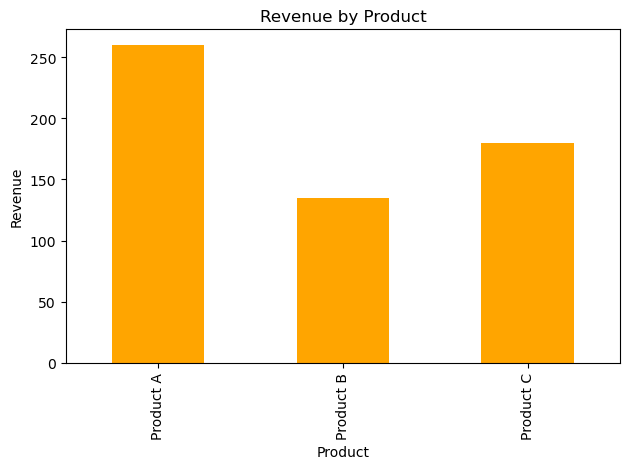

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect("sales_data.db")

# Step 2: Run the SQL query
query = """
SELECT product, 
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 3: Display the result
print("📊 Sales Summary:\n")
print(df)

# Step 4: Plot bar chart of revenue
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', color='orange', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Step 5: Optional - Save chart
plt.savefig("sales_chart.png")

# Step 6: Show chart
plt.show()

# Step 7: Close DB connection
conn.close()


In [3]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>